#TASK #1: UNDERSTAND THE THEORY AND INTUITION BEHIND CAPITAL ASSET PRICING MODEL (CAPM) 

![alt text](https://drive.google.com/uc?id=1rGljEUj4EEwo4Y9vzuXjM2le_tGC1NFy)

![alt text](https://drive.google.com/uc?id=1BYrA8caoVBNS0ZZusSas0u5y_o8N4c3f)

![alt text](https://drive.google.com/uc?id=1M5TERDwqNNTbV1a-_fLKWvdGcxHqNdKF)

![alt text](https://drive.google.com/uc?id=1KLHifTx79y-e2xrNPSZ-wY2tCrZEzVZC)

![alt text](https://drive.google.com/uc?id=1LIM_wMcQjcOh-4U3h_NXYM6fIborwJTp)

![alt text](https://drive.google.com/uc?id=1j8HYfvy6Gn0v3a8z5cnuL4p-CvcVa8Va)

![alt text](https://drive.google.com/uc?id=1_9Tw_D0MRDnbZ7huDDfnJbbhHZVhFvPb)

# TASK #2: IMPORT LIBRARIES/DATASETS AND VISUALIZE STOCKS DATA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
# Read the stock data file
stocks_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Python & ML in Finance/Part 2. Financial Analysis in Python/stock.csv')
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,60.198570,75.510002,30.120001,12.130000,175.929993,180.550003,28.250000,313.644379,1295.500000
1,2012-01-13,59.972858,74.599998,30.070000,12.350000,178.419998,179.160004,22.790001,311.328064,1289.089966
2,2012-01-17,60.671429,75.239998,30.250000,12.250000,181.660004,180.000000,26.600000,313.116364,1293.670044
3,2012-01-18,61.301430,75.059998,30.330000,12.730000,189.440002,181.070007,26.809999,315.273285,1308.040039
4,2012-01-19,61.107143,75.559998,30.420000,12.800000,194.449997,180.520004,26.760000,318.590851,1314.500000
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,440.250000,174.279999,29.850000,16.719999,3205.030029,125.449997,1485.020020,1473.609985,3327.770020
2155,2020-08-06,455.609985,172.199997,29.840000,18.459999,3225.000000,126.120003,1489.579956,1500.099976,3349.159912
2156,2020-08-07,444.450012,170.020004,30.020000,19.030001,3167.459961,124.959999,1452.709961,1494.489990,3351.280029
2157,2020-08-10,450.910004,179.410004,30.200001,21.650000,3148.159912,127.110001,1418.569946,1496.099976,3360.469971


In [ ]:
# Function to normalize the prices based on the initial price
def normalize(df):
  x = df.copy()
  for i in x.columns[1:]:
    x[i] = x[i]/x[i][0]
  return x

**MINI CHALLENGE #1:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data** 
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck** 

# TASK #3: CALCULATE DAILY RETURNS

In [ ]:
# Function to calculate the daily returns 
def daily_return(df):

  df_daily_return = df.copy()
  
  # Loop through each stock
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):
      
      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero, as previous value is not available
    df_daily_return[i][0] = 0
  return df_daily_return

In [ ]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)
stocks_daily_return

,Date,AAPL,BA,T,MGM,AMZN,IBM,TSLA,GOOG,sp500
0,2012-01-12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2012-01-13,-0.374946,-1.205144,-0.166006,1.813685,1.415339,-0.769869,-19.327430,-0.738516,-0.494792
2,2012-01-17,1.164812,0.857909,0.598603,-0.809717,1.815943,0.468852,16.717854,0.574410,0.355295
3,2012-01-18,1.038382,-0.239234,0.264463,3.918367,4.282725,0.594448,0.789470,0.688856,1.110793
4,2012-01-19,-0.316937,0.666134,0.296736,0.549882,2.644634,-0.303752,-0.186494,1.052283,0.493866
...,...,...,...,...,...,...,...,...,...,...
2154,2020-08-05,0.362467,5.579446,-0.533156,0.000000,2.109065,-0.309917,-0.133153,0.589774,0.642974
2155,2020-08-06,3.488923,-1.193483,-0.033501,10.406699,0.623082,0.534082,0.307062,1.797626,0.642770
2156,2020-08-07,-2.449458,-1.265966,0.603217,3.087768,-1.784187,-0.919762,-2.475194,-0.373974,0.063303
2157,2020-08-10,1.453480,5.522880,0.599604,13.767729,-0.609323,1.720552,-2.350092,0.107728,0.274222


**MINI CHALLENGE #2:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


# TASK #4: CALCULATE BETA FOR A SINGLE STOCK

In [ ]:
# Select any stock, let's say Apple 
stocks_daily_return['AAPL']

0       0.000000
1      -0.374946
2       1.164812
3       1.038382
4      -0.316937
          ...   
2154    0.362467
2155    3.488923
2156   -2.449458
2157    1.453480
2158   -2.973987
Name: AAPL, Length: 2159, dtype: float64

In [ ]:
# Select the S&P500 (Market)
stocks_daily_return['sp500']

0       0.000000
1      -0.494792
2       0.355295
3       1.110793
4       0.493866
          ...   
2154    0.642974
2155    0.642770
2156    0.063303
2157    0.274222
2158   -0.796913
Name: sp500, Length: 2159, dtype: float64

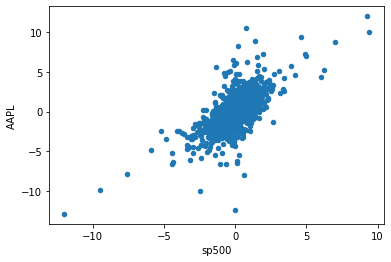

In [ ]:
# plot a scatter plot between the selected stock and the S&P500 (Market)
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)

# beta represents the slope of the line regression line (market return vs. stock return). 
# Beta is a measure of the volatility or systematic risk of a security or portfolio compared to the entire market (S&P500) 
# Beta is used in the CAPM and describes the relationship between systematic risk and expected return for assets 

# Beta = 1.0, this indicates that its price activity is strongly correlated with the market. 
# Beta < 1, indicates that the security is theoretically less volatile than the market (Ex: Utility stocks). If the stock is included, this will make the portfolio less risky compared to the same portfolio without the stock.
# Beta > 1, indicates that the security's price is more volatile than the market. For instance, Tesla stock beta is 1.26 indicating that it's 26% more volatile than the market. 
# Tech stocks generally have higher betas than S&P500 but they also have excess returns
# MGM is 65% more volatile than the S&P500!


beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['AAPL'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('AAPL', beta, alpha))  

Beta for AAPL stock is = 1.1128924148678099 and alpha is = 0.052812084694402864


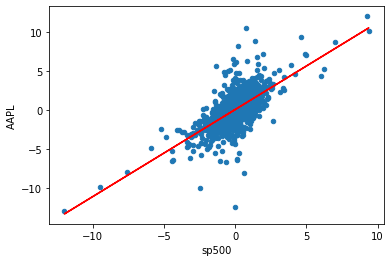

In [ ]:
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'AAPL')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


**MINI CHALLENGE #3:**
- **Calculate Beta for Tesla Inc. and compare it with Apple**

# TASK #5: APPLY THE CAPM FORMULA TO AN INDIVIDUAL STOCK 

In [ ]:
beta

1.1128924148678099

In [ ]:
# Let's calculate the average daily rate of return for S&P500
stocks_daily_return['sp500'].mean()

0.049316006600389206

In [ ]:
# Let's calculate the annualized rate of return for S&P500 
# Note that out of 365 days/year, stock exchanges are closed for 104 days during weekend days (Saturday and Sunday) 
# Check your answers with: https://dqydj.com/sp-500-return-calculator/
rm = stocks_daily_return['sp500'].mean() * 252
rm

12.42763366329808

In [ ]:
# Assume risk free rate is zero
# Also you can use the yield of a 10-years U.S. Government bond as a risk free rate
rf = 0 

# Calculate return for any security (APPL) using CAPM  
ER_AAPL = rf + ( beta * (rm-rf) ) 

In [ ]:
ER_AAPL

13.830619238640287

**MINI CHALLENGE #4:**
- **Apply CAPM formula to calculate the return for AT&T**  

# TASK #6: CALCULATE BETA FOR ALL STOCKS

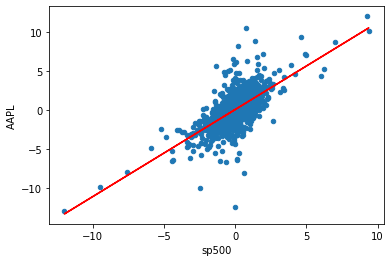

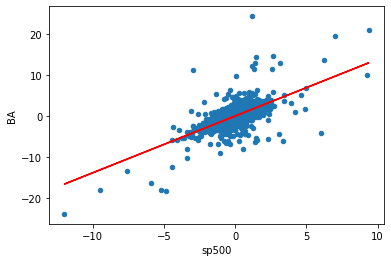

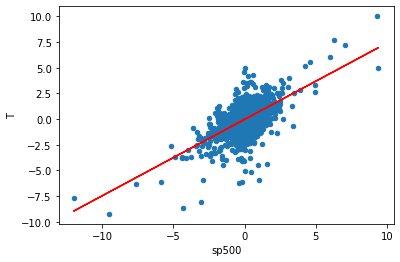

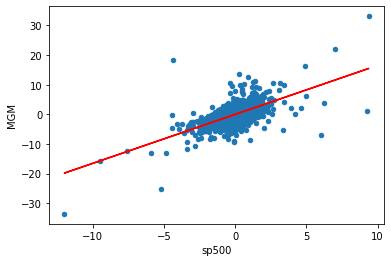

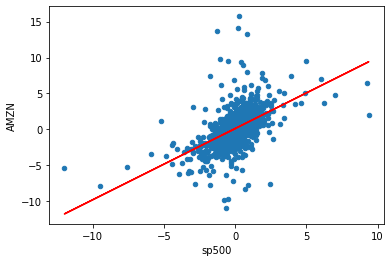

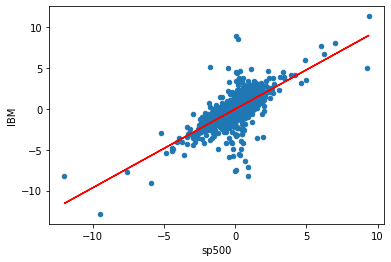

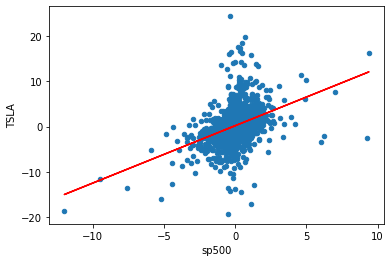

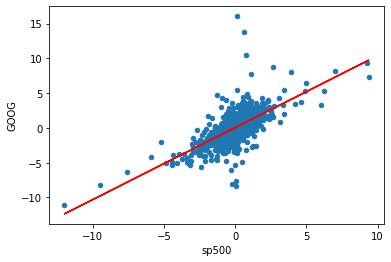

In [ ]:
# Let's create a placeholder for all betas and alphas (empty dictionaries)
beta = {}
alpha = {}

# Loop on every stock daily return
for i in stocks_daily_return.columns:

  # Ignoring the date and S&P500 Columns 
  if i != 'Date' and i != 'sp500':
    # plot a scatter plot between each individual stock and the S&P500 (Market)
    stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = i)
    
    # Fit a polynomial between each stock and the S&P500 (Poly with order = 1 is a straight line)
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    plt.plot(stocks_daily_return['sp500'], b * stocks_daily_return['sp500'] + a, '-', color = 'r')
    
    beta[i] = b
    
    alpha[i] = a
    
    plt.show()

In [ ]:
# Let's view Beta for every stock 
beta

{'AAPL': 1.1128924148678099,
 'AMZN': 0.9917345712576846,
 'BA': 1.3828672010892775,
 'GOOG': 1.034881768742856,
 'IBM': 0.9604149148095245,
 'MGM': 1.653567706518011,
 'T': 0.7446293454747844,
 'TSLA': 1.2686150101095908}

In [ ]:
# Let's view alpha for each of the stocks
# Alpha describes the strategy's ability to beat the market (S&P500)
# Alpha indicates the “excess return” or “abnormal rate of return,” 
# A positive 0.175 alpha for Tesla means that the portfolio’s return exceeded the benchmark S&P500 index by 17%.

alpha

{'AAPL': 0.052812084694402864,
 'AMZN': 0.1022139641776522,
 'BA': -0.0022906983297531543,
 'GOOG': 0.03335558721467005,
 'IBM': -0.053454941504451084,
 'MGM': -0.016885305520478674,
 'T': -0.028563430198461616,
 'TSLA': 0.1758349216516583}

**MINI CHALLENGE #5:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


# TASK #7: APPLY CAPM FORMULA TO CALCULATE THE RETURN FOR THE PORTFOLIO

In [ ]:
# Obtain a list of all stock names
keys = list(beta.keys())
keys

['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG']

In [ ]:
# Define the expected return dictionary
ER = {}

rf = 0 # assume risk free rate is zero in this case
rm = stocks_daily_return['sp500'].mean() * 252 # this is the expected return of the market 
rm

12.42763366329808

In [ ]:
for i in keys:
  # Calculate return for every security using CAPM  
  ER[i] = rf + ( beta[i] * (rm-rf) ) 

In [ ]:
for i in keys:
  print('Expected Return Based on CAPM for {} is {}%'.format(i, ER[i]))

Expected Return Based on CAPM for AAPL is 13.830619238640287%
Expected Return Based on CAPM for BA is 17.1857669801279%
Expected Return Based on CAPM for T is 9.253980720502046%
Expected Return Based on CAPM for MGM is 20.54993369406583%
Expected Return Based on CAPM for AMZN is 12.324913942818489%
Expected Return Based on CAPM for IBM is 11.935684726020403%
Expected Return Based on CAPM for TSLA is 15.765882605403183%
Expected Return Based on CAPM for GOOG is 12.861131506762176%


In [ ]:
# Assume equal weights in the portfolio
portfolio_weights = 1/8 * np.ones(8) 
portfolio_weights

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

In [ ]:
# Calculate the portfolio return 
ER_portfolio = sum(list(ER.values()) * portfolio_weights)
ER_portfolio

14.213489176792537

In [ ]:
print('Expected Return Based on CAPM for the portfolio is {}%\n'.format(ER_portfolio))

Expected Return Based on CAPM for the portfolio is 14.213489176792537%



**MINI CHALLENGE #6:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


# **AWESOME JOB!**

# **MINI CHALLENGES SOLUTIONS**

**MINI CHALLENGE #1 SOLUTION:**
- **Create a function to plot stocks data in an interactive way using Plotly Express**
- **Call the function and visualize the stocks data** 
- **Call the function visualize normalized stocks data**
- **Note: Check earlier lectures if you get stuck** 

In [ ]:
# Function to plot interactive plot
def interactive_plot(df, title):
  fig = px.line(title = title)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i)
  fig.show()

In [ ]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

In [ ]:
# Plot normalized interactive chart
interactive_plot(normalize(stocks_df), 'Normalized Prices')

**MINI CHALLENGE #2 SOLUTION:**
- **Which of the following has higher average daily return?**
   - S&P500 or Google
   - S&P500 or Amazon


In [ ]:
stocks_daily_return.mean()
# S&P500 average daily return is 0.049%
# Amazon average daily return is 0.15%
# Google average daily return is 0.084%

AAPL     0.107695
BA       0.065907
T        0.008159
MGM      0.064662
AMZN     0.151122
IBM     -0.006091
TSLA     0.238398
GOOG     0.084392
sp500    0.049316
dtype: float64

**MINI CHALLENGE #3 SOLUTION:**
- **Calculate Beta for Tesla Inc. and compare it with Apple**

1.2686150101095908


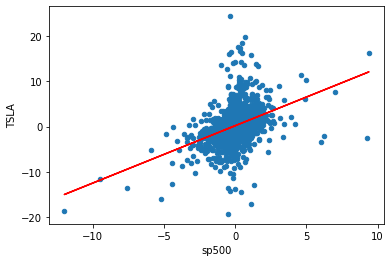

In [ ]:
# Fit a polynomial between the selected stock and the S&P500 (Poly with order = 1 is a straight line)
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['TSLA'], 1)
print(beta)  
# Now let's plot the scatter plot and the straight line on one plot
stocks_daily_return.plot(kind = 'scatter', x = 'sp500', y = 'TSLA')

# Straight line equation with alpha and beta parameters 
# Straight line equation is y = beta * rm + alpha
plt.plot(stocks_daily_return['sp500'], beta * stocks_daily_return['sp500'] + alpha, '-', color = 'r')


**MINI CHALLENGE #4 SOLUTION:**
- **Apply CAPM formula to calculate the return for AT&T**  

In [ ]:
# You have to calculate Beta for Amazon first
beta, alpha = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return['T'], 1)
print('Beta for {} stock is = {} and alpha is = {}'.format('T', beta, alpha)) 

Beta for T stock is = 0.7446293454747844 and alpha is = -0.028563430198461616


In [ ]:
# Calculate return for AT&T using CAPM  
ER_T = rf + ( beta * (rm - rf) ) 
print(ER_T)

9.253980720502046


**MINI CHALLENGE #5 SOLUTION:**
- **Using Plotly Express, plot an interactive plot showing S&P500 daily returns vs. every stock**
- **Plot the best fit straight line (with Alpha and Beta values)**  


In [ ]:
# Let's do the same plots but in an interactive way
# Explore some wierd points in the dataset: Tesla stock return was at 24% when the S&P500 return was -0.3%!

for i in stocks_daily_return.columns:
  
  if i != 'Date' and i != 'sp500':
    
    # Use plotly express to plot the scatter plot for every stock vs. the S&P500
    fig = px.scatter(stocks_daily_return, x = 'sp500', y = i, title = i)

    # Fit a straight line to the data and obtain beta and alpha
    b, a = np.polyfit(stocks_daily_return['sp500'], stocks_daily_return[i], 1)
    
    # Plot the straight line 
    fig.add_scatter(x = stocks_daily_return['sp500'], y = b*stocks_daily_return['sp500'] + a)
    fig.show()

**MINI CHALLENGE #6 SOLUTION:**
- **Calculate the expected return for the portfolio assuming we only have 50% allocation in Apple and 50% in Amazon**


In [ ]:
ER['AMZN']

12.324913942818489

In [ ]:
# Calculate the portfolio return 
ER_portfolio = 0.5 * ER['AAPL'] +  0.5 * ER['AMZN']
ER_portfolio

13.077766590729388